### MA3402 Estadística
## Tarea 1, Entrega 4: Colas Pesadas e Información de Fisher

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.

**Integrantes:** Gaspar Herreros y Tomás Ramírez.

## Objetivo:
El objetivo de esta tarea será hacerles conocer varias técnicas estadísticas con que se puede analizar el _comportamiento_ de una distribución de datos que, a priori, no tenemos la más mínima idea sobre cómo podría ser modelada (de forma "efectiva" por lo menos).

In [ ]:
# 1. Instalación de paquetes:
install.packages("ggplot2")
install.packages("EnvStats")

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(EnvStats)


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm




## Gentil introducción a las _colas pesadas_

En la vida, nos tocará enfrentar problemas en que nos darán una matriz con datos, y estaremos obligadxs a tratar de sacar la máxima información posible a partir de ellos. A lo largo del curso iremos experimentando con varias ideas que se usan mucho en la práctica; el objetivo de este notebook es intentar introducirles a la idea de _modelar un problema_ del que pueden no tener mucho conocimiento _a priori_.

En particular, en este problema buscaremos decidir qué tipo de modelo probabilístico puede ser conveniente para modelar un fenómeno del mundo real: las distribuciones de Pareto vs. las Exponenciales. Estudiaremos también algunas de las propiedades de los estimadores de máxima verosimilitud (EMV) para este tipo de modelos.

Recordemos cómo es la forma de las funciones de densidad de las v.a.s Pareto y las v.a.s exponenciales. Ambas son v.a.s que toman valores en los números positivos y que buscan describir _cómo decae la frecuencia de eventos que toman valores cada vez "más grandes"_. Son súper útiles para modelar cosas como el tamaño de ciudades (hay muchas ciudades con pocos habitantes y pocas con muchos habitantes), el GDP de un país (hay pocos países con alto GDP y muchos con GDP muy bajo) o la riqueza dentro de un país ("ta mal pelao el chancho" o, en términos estadísticos, muchos individuos tienen poco y muy pocos tienen mucho). Ahora, recordemos un poco cómo se describen estas v.a.s.

Sabemos, por ejemplo, que las v.a.s de **Pareto** son tales que, para unos parámetros $\alpha>0$ y $c >0$, tienen funciones de densidad de la forma:  
$$p_{\alpha, c}(x) ={\frac {\alpha c^{\alpha }}{x^{\alpha +1}}} 1_{x \geq c}$$
(para más información, véase https://en.wikipedia.org/wiki/Pareto_distribution)
Podemos notar que estas densidades tienen un decaimiento "polinomial", con lo que se dice que el modelo es de "colas pesadas" (veremos una ilustración de esto más adelante).

Por su parte, las v.a.s **Exponenciales** dependen de un parámetro $\alpha >0$, y tienen densidades de la forma: $$q_\alpha(x) = \alpha e^{-\alpha x} 1_{x \geq 0}$$
(véase https://en.wikipedia.org/wiki/Exponential_distribution para más información).
Este tipo de modelo tiene "colas ligeras", en tanto su densidad decae exponencialmente (y por ende, más rápido que cualquier polinomio).

Ahora, para comparar "de igual a igual" los modelos de Pareto (colas pesadas) y los Exponenciales (colas ligeras), definiremos un nuevo tipo de v.a. que consiste en una **Exponencial shifteada**, de modo que su soporte está, para $c>0$, en $[c, +\infty]$ (en vez de $[0, +\infty]$ como es usual). Esto será esencialmente lo que corresponde a una v.a. $X = Y + c$, con $Y\sim Exp(\alpha)$. La densidad para una tal v.a. se escribe como (para $\alpha>0$ y $c >0$):
$$q_{\alpha, c}(x) = \alpha e^{-\alpha (x-c)} 1_{x \geq c}$$
Este será el modelo de "colas ligeras" que podremos comparar "sin problemas" a las v.a.s de Pareto.

Incluimos el siguiente código para calcular la _densidad_ de las v.a.s que estudiaremos:

In [ ]:
pareto <- function(a, c, x){
    return ((x>=c)*((a*(c^a))/(x**(a+1))))
}

exp.shift <- function(a, c, x){
  return ((x>=c)*a*exp(-a*(x-c)))
}

**1.-** Grafique las densidades $p_{\alpha, c}$ y $q_{\alpha, c}$ para valores de los parámetros $\alpha >0$ y $c>0$ de su elección (pero usando los mismos valores de $\alpha$ y $c$ para ambas familias de densidades). Grafique estas mismas densidades en una escala log-log (i.e. log en el eje x y log en el eje y; considere las funciones $\texttt{scale\_x\_log10}$ y $\texttt{scale\_y\_log10}$ de ggplot). Comente lo que se observa con respecto a las _colas_ de las distribuciones.

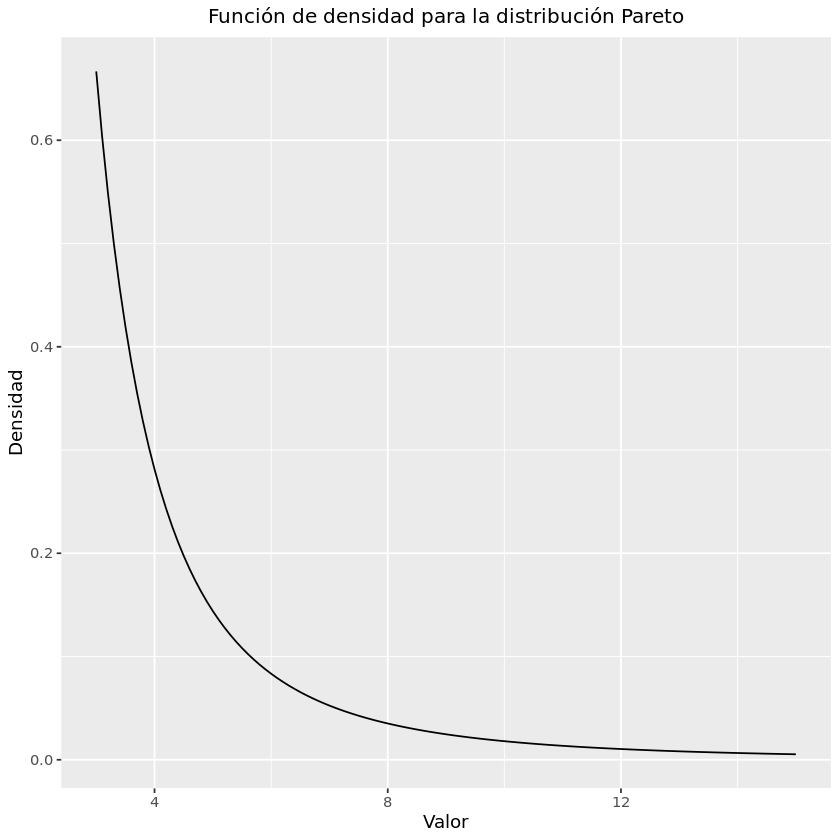

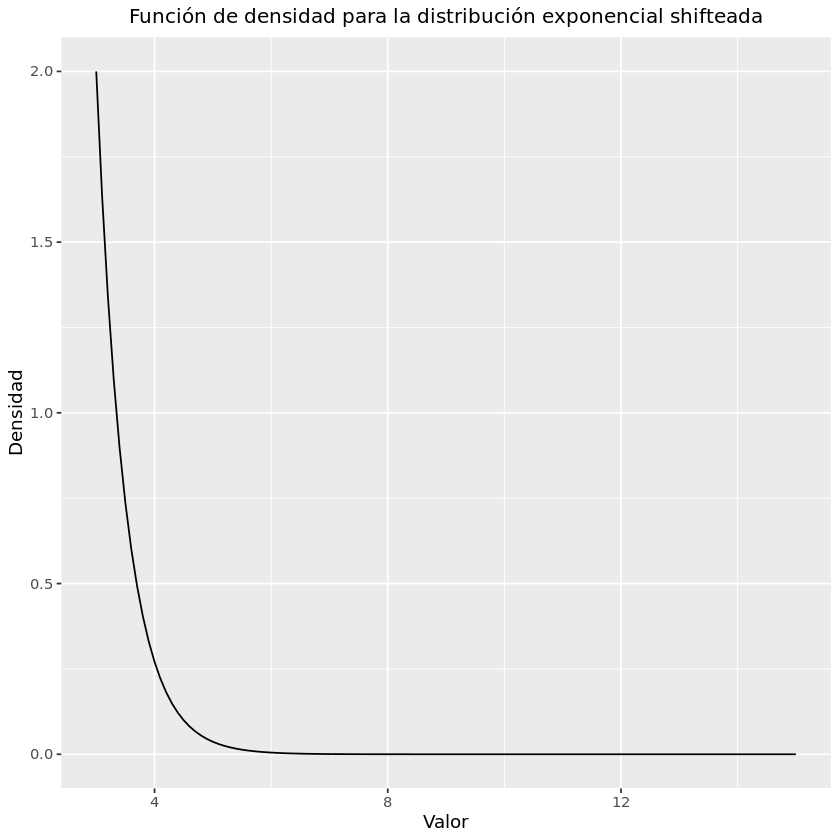

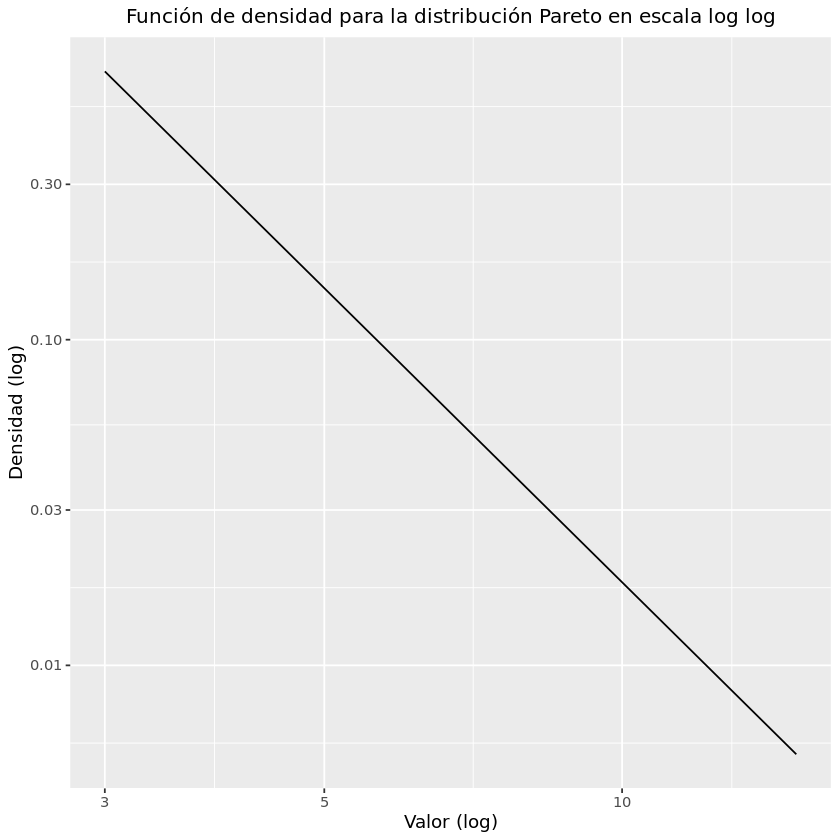

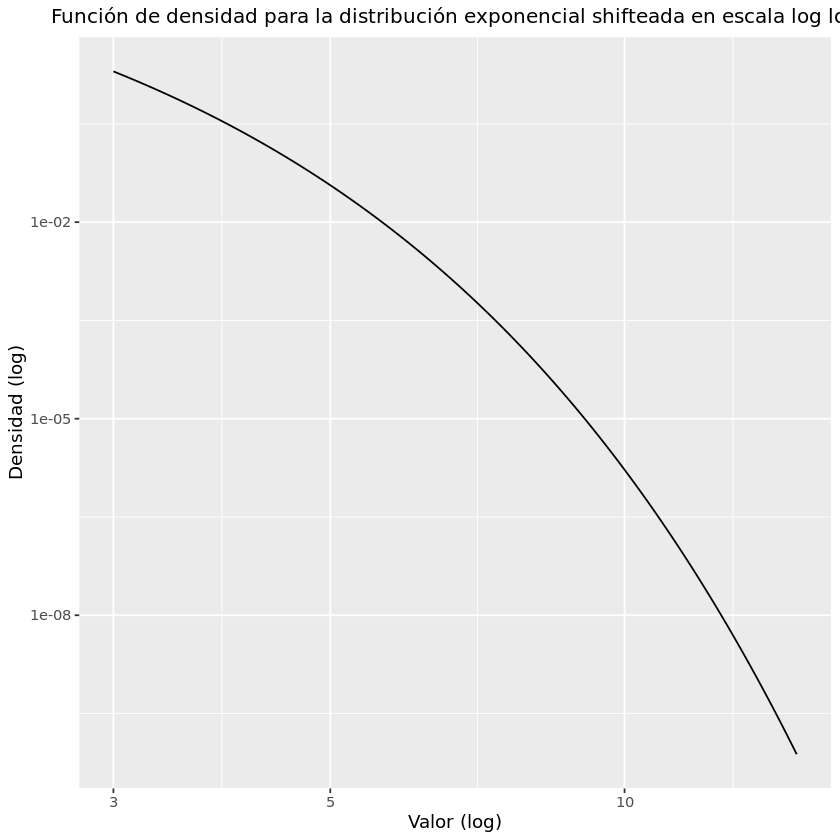

In [ ]:
# Definimos las constantes
alfa = 2
c = 3

# Guardamos la información para posteriormente graficar
x<-seq(from=c,to=15,by=0.1)
p<-pareto(alfa, c, x)
q<-exp.shift(alfa, c, x)
data<-data.frame(x,p,q)

# Generamos los gráficos
plot.pareto<-ggplot(data, aes(x,p)) + geom_line()
plot.exp.shift<-ggplot(data,aes(x,q)) + geom_line()

# Mostramos los gráficos en pantalla de las funciones de densidad en escala normal
plot.pareto + labs(
    title = "Función de densidad para la distribución Pareto",
    x = "Valor",
    y = "Densidad") +
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
plot.exp.shift + labs(
    title = "Función de densidad para la distribución exponencial shifteada",
    x = "Valor",
    y = "Densidad") +
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))

# Mostramos los gráficos en pantalla de las funciones de densidad en escala log log
plot.pareto + 
    scale_x_log10() + 
    scale_y_log10() + 
    labs(
    title = "Función de densidad para la distribución Pareto en escala log log",
    x = "Valor (log)",
    y = "Densidad (log)") +
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))

plot.exp.shift + 
    scale_x_log10() + 
    scale_y_log10() + 
    labs(
    title = "Función de densidad para la distribución exponencial shifteada en escala log log",
    x = "Valor (log)",
    y = "Densidad (log)") +
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))

---

**Q:** Comente lo que se observa con respecto a las _colas_ de las distribuciones.

**R:** En los dos primeros gráficos se puede ver de forma sumamente claro como las colas de las distribuciones dependen de si estamos graficando la función de distribución de una Pareto o de una exponencial shifteada. En el caso del gráfico de la Pareto, se puede apreciar como la cola es más "pesada", es decir, la función de distribución se "demora" en decaer. En otras palabras, hay una cantidad importante de valores "grandes" y no están todos concentrados al inicio de la distribución. Por otro lado, en la distribución de una exponencial shifteada se ve todo lo contrario, es decir, la gran mayoría de los datos están acumulados al principio de la distribución, mientras que casi no hay valores "grandes". Es decir, la distribución de los datos tiene una "cola liviana", pues se ve como la función decae rápidamente. Esto lo que quiere decir es que para las colas livianas hay una gran densidad de datos al inicio de la distribución, mientras que para colas pesadas la densidad se distribuye de una manera más progresiva (aunque en ambos casos la gran parte de los datos está al inicio, solo que en uno el decaimiento es más marcado que en el otro).

---

Con esto, podemos ver que la idea de las colas _livianas_ o _pesadas_ se puede ver en las funciones de densidad. Sin embargo (y lo que será de mayor interés) será observar este fenómeno directamente a partir de las _muestras_ de la v.a. (en la práctica nos llegarán _datos_ y vamos a querer entender si tienen (o no) colas _pesadas_).

Por ejemplo, podemos samplear aleatoriamente de alguna de nuestras distribuciones, y ver _qué rangos de valores se obtienen_ (si los valores llegan a ser muy altos, uno tendería a pensar en un fenómeno de _colas pesadas_).

Por otro lado, a partir de nuestros datos (o muestras) podemos tratar de armar una _función de densidad acumulada_. Es decir, dada una muestra $ x_1, \ldots, x_n $, podemos calcular la _densidad acumulada empírica_ como:

$$
\hat G(x) = \frac{1}{n} \sum_{i=1}^n \mathbb 1\{x_i > x\}
$$

Esta función mide cuántas muestras se encontraron (en promedio) por sobre cada valor de x (de alguna forma, midiendo el "peso de la cola" de la distribución). En particular, nos será muy útil para identificar el tipo de _cola_ que tiene un cierto conjunto de datos.

**2.-** Fije unos parámetros $c$ y $\alpha$ de su agrado, y samplee aleatoriamente $N = 1000$ muestras de v.a.s **pareto** ($p_{\alpha, c}$) y **exponenciales** **shifteadas** ($q_{\alpha, c}$) (usando los parámetros $c>0$ y $\alpha>0$ seleccionados; le puede ser útil la función $\texttt{rpareto}$ del módulo _EnvStats_).

Grafique el histograma asociado a cada uno de los modelos de los que se sampleó, incluyendo la función de densidad a partir de la cual estos datos fueron simulados.

Grafique, utilizando la función $\texttt{muestras}$, los valores particulares que se obtuvo en las simulaciones (esto le permitirá ver el _rango_ de valores alcanzados por las muestras de cada modelo).

Calcule la función de _densidad acumulada empírica_ para esta muestra aleatoria de datos y grafique sus valores en escala log-log (use para ello la función $\texttt{empirical\_ccdf}$ dada más abajo).

En base a lo que puede observar de estos gráficos, ¿cómo se le ocurriría utilizar estas técnicas para decidir, en base a evidencia empírica, el tipo de modelo estadístico a utilizar para modelar el comportamiento de sus datos?

In [ ]:
eccdf <- function(x, data) {
  mean(data > x)
}
# OJO esta función no recibe un dataframe, sino derechamente la lista de datos 
#(e.g. si tengo mis muestras de una v.a. en un data.frame df, en la columna "muestras", debo pasarle df$muestras o df[, "muestras"])
# El parámetro line agrega (o no) una línea de tendencia a su gráfico
empirical_ccdf <- function(data, line= FALSE) {
  x <- sort(data)
  y <- sapply(x, eccdf, data = data)
  df <- data.frame(x = x, y = y)
  pp <- ggplot(df, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) +
    scale_x_log10() +
    scale_y_log10() +
    labs(x = "Log Value", y = "Log Prob.")
if(line){
    return(pp + 
  geom_smooth(method='lm', formula= y~x, colour = "blue"))
}
else{
    return(pp)
}
}

# Esta función recibe el df donde tienen guardados sus datos y la columna de interés
muestras <- function(df, col, y_min = 0, y_max = 80){
    L= length(df[,col])
    pp <-ggplot(df, aes(x = 1:L, y = !!sym(col))) + 
    geom_point(alpha = 0.5) +
    geom_linerange(aes(ymin = 0, ymax = !!sym(col)), color = "blue", alpha = 0.5) +
    labs(x = "Índice", y = "Valor", title= "Valores de las muestras aleatorias") +
    ylim(y_min, y_max)
    return(pp);
}

In [ ]:
# Generamos las variables aleatorias
N<-1000
r.pareto<-rpareto(N, c, alfa)
r.exp.shift<-rexp(N, rate=alfa) + c
vas<-data.frame(r.pareto, r.exp.shift)

In [ ]:
# Importamos la función para plotear 
my.hist <- function(df, col, binwidth=0.1, xmin=-4, xmax=4){
    p <- ggplot(df, aes(x=!! sym(col))) + 
    geom_histogram(aes(y=after_stat(density)), colour="black", fill="white", binwidth = binwidth) +
    geom_density(alpha=.2, fill="#FF6666") + 
    labs(
        title='Histograma de la distribución',
        x = "Valor",
        y = "Frecuencia"
    ) + 
    theme(plot.title = element_text(h=0.5, face = "bold.italic")) + 
    coord_cartesian(xlim = c(xmin, xmax))
    return(p);
}


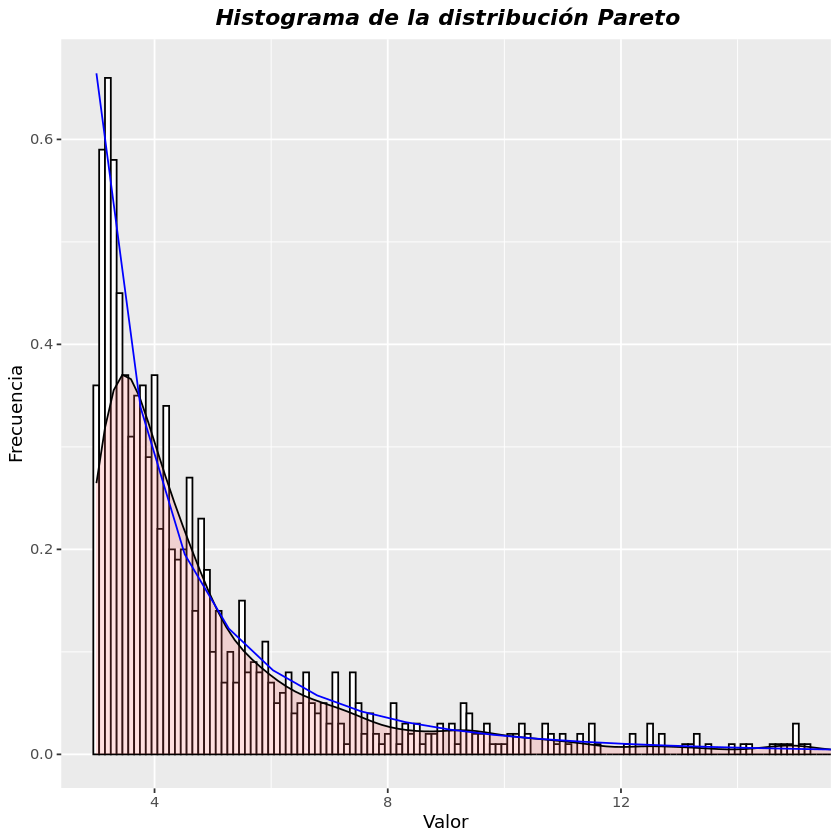

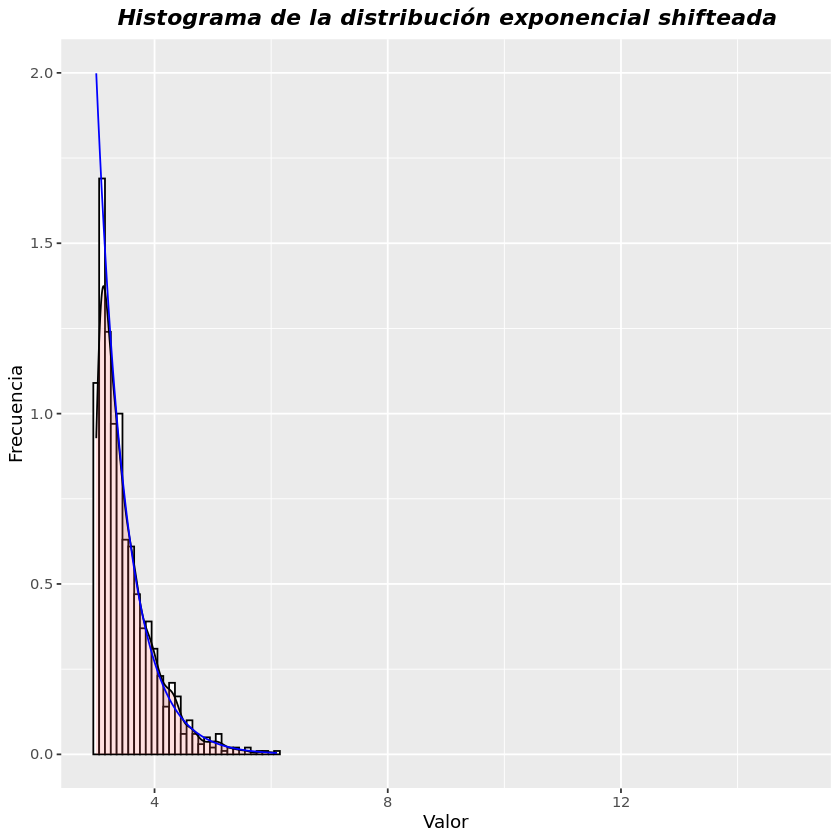

In [ ]:
# Generamos los histogramas
p.pareto<-my.hist(vas, "r.pareto", xmin=c, xmax=15)
p.exp.shift<-my.hist(vas, "r.exp.shift", xmin=c, xmax=15)

# Graficamos los histogramas junto a las funciones de densidad
p.pareto + geom_function(fun = function(r.pareto) pareto(alfa,c,r.pareto), color = "blue") + 
    labs(title = "Histograma de la distribución Pareto")
p.exp.shift + geom_function(fun = function(r.exp.shift) exp.shift(alfa,c,r.exp.shift), color = "blue") + 
    labs(title = "Histograma de la distribución exponencial shifteada")

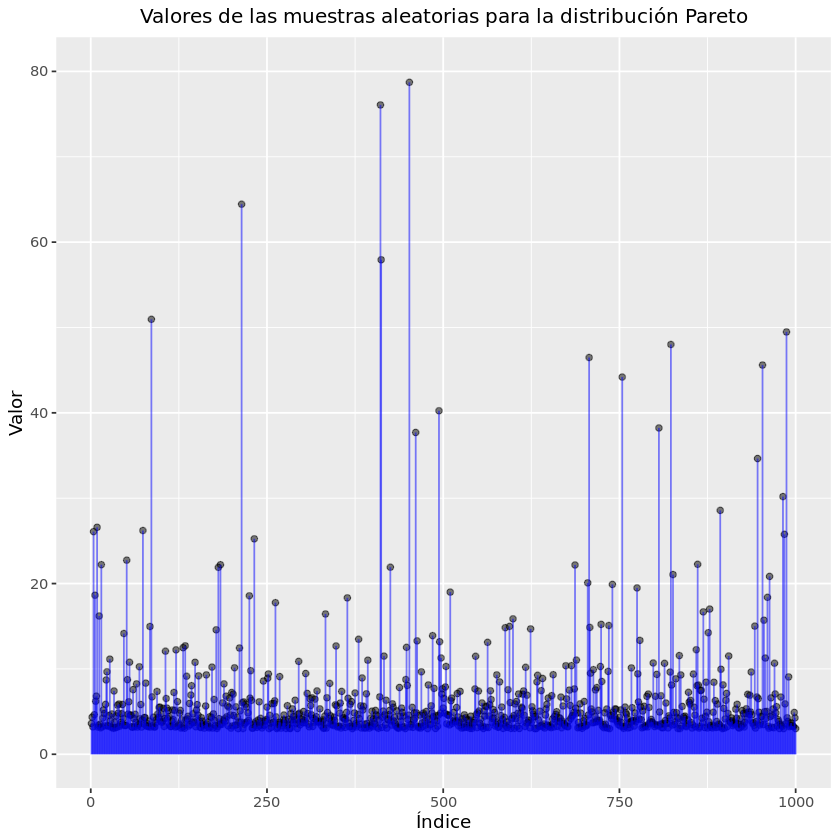

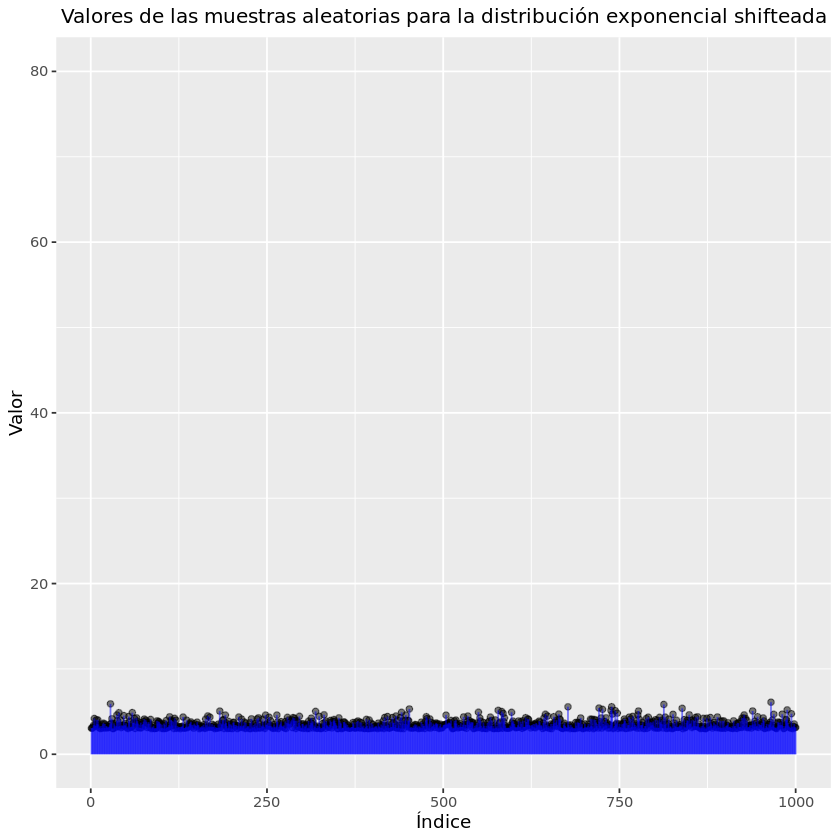

In [ ]:
# Graficamos los valores particulares que se obtuvieron en las simulaciones
muestras(vas, "r.pareto") + labs(title = "Valores de las muestras aleatorias para la distribución Pareto") +
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
muestras(vas, "r.exp.shift") + labs(title = "Valores de las muestras aleatorias para la distribución exponencial shifteada") +
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


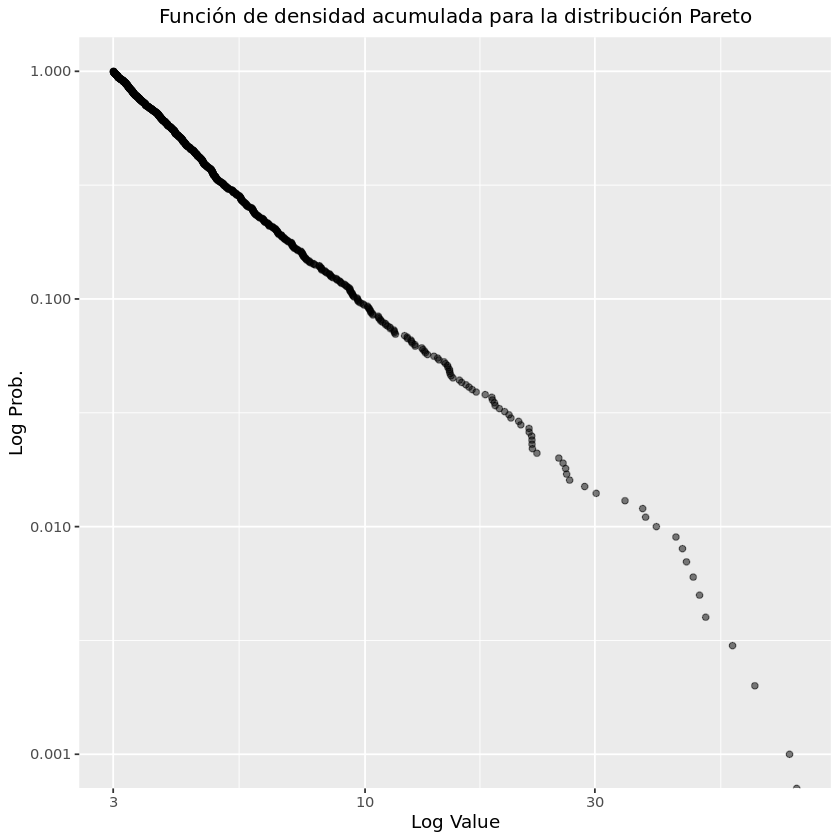

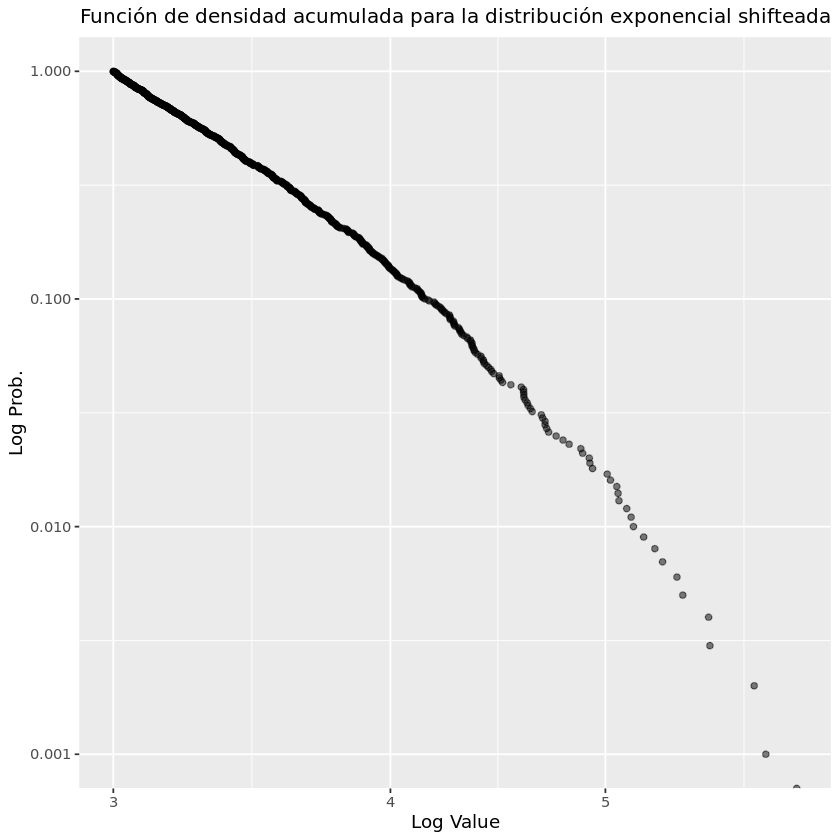

In [ ]:
# Graficamos la función de densidad acumulada empírica
empirical_ccdf(vas$r.pareto) + labs(title = "Función de densidad acumulada para la distribución Pareto") + 
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
empirical_ccdf(vas$r.exp.shift) + labs(title = "Función de densidad acumulada para la distribución exponencial shifteada") + 
    theme(plot.title = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))

---

**Q:** En base a lo que puede observar de estos gráficos, ¿cómo se le ocurriría utilizar estas técnicas para decidir, en base a evidencia empírica, el tipo de modelo estadístico a utilizar para modelar el comportamiento de sus datos?

**R:** Creemos que la respuesta para decidir qué modelo utilizar en base a la evidencia empírica es súper directa. Si vemos los histogramas, hay que fijarse qué tan rápido decae la cantidad de muestras a medida que aumenta el valor de $x$. Si vemos que la cantidad de muestras decae rápidamente (y por ende casi no se ven intervalos para valores de $x$ "altos"), entonces claramente hay que usar un modelo de "colas livianas", mientras que en caso contrario (o sea vemos intervalos incluso para valores de $x$ "altos"), entonces hay que usar un modelo de "colas pesadas". Si ahora nos fijamos en los gráficos que muestran los valores específicos que se obtuvieron, hay que fijarse si es que hay una gran cantidad de muestras para valores altos de $x$ (es decir, si es que dado un índice, este tuvo valor grande, para varios índices). Si este es el caso, entonces habrá que utilizar un modelo de colas pesadas. En caso contrario, en el que para casi todos los índices se vea que los datos tienen un valor pequeño, entonces se tendrá que usar un modelo de colas livianas. Finalmente, fijándonos en el último gráfico, nuevamente tenemos que fijarnos en qué tan rápido decae la densidad acumulada empírica. Puesto que esta mide cuántas muestras se encontraron (en promedio) por sobre cada valor de $x$, si con un $x$ "pequeño" ya casi no se encuentran muestras sobre este valor, se tendrá que hay que usar un modelo de colas livianas. Si en caso contrario incluso para valores de $x$ "grandes" siguen habiendo muestras por sobre ese $x$, entonces será un modelo de colas pesadas.

---

## Pongámoslo en Práctica !1!!

Adjunto a esta tarea vienen varios .csv con datos del mundo real, correspondientes a diferentes fenómenos de alto interés:
- Firmas_Grandes.csv contiene los datos del tamaño de las 500 empresas más grandes del planeta, según su valor de mercado (columna $\texttt{Market.Value}$). Nos interesará entender cómo distribuye el valor de mercado entre las diferentes firmas.
- GDP.csv contiene la información del PIB (y el PIB per cápita) para los distintos países del planeta. Nos interesará entender cómo distribuye el PIB per cápita (columna $\texttt{GDP.per.capita}$) entre los diferentes países.
- CiudadesUS.csv contiene varios datos interesantes sobre las ciudades más importantes de EEUU. Nos interesará, por ejemplo, entender cómo distribuye el tamaño de la población entre las diferentes ciudades (columna $\texttt{pop2023}$ para el año 2023).

**3.-** Lean estos diferentes conjuntos de datos usando R. Observen, con el comando $\texttt{head}$, cómo están estructurados más o menos los datasets.

Grafiquen el histograma de estas muestras así como la _función de densidad acumulada empírica_ para cada uno. 

En base a la discusión anterior, ¿qué tipo de modelo privilegiaría en cada uno de estos _datasets_? Decida qué modelo estadístico utilizará para intentar _aproximar_ el comportamiento de cada uno de los diferentes conjuntos de datos.

,X,Country,Sales,Profits,Assets,Market.Value
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,Saudi Arabia,329762,88205,398296,1684765
2,14,United States,138604,46266,285449,1359028
3,8,United States,267712,57215,320400,1285516
4,21,United States,296274,10562,221238,1233351
5,12,United States,166310,34522,273403,919284
6,38,United States,73357,20958,138371,583675


,country,GDP,GDP.per.capita
,<chr>,<dbl>,<dbl>
1,Afghanistan,14583135237,363.6741
2,Albania,17930565119,6377.2031
3,Algeria,163472233246,3700.3112
4,American Samoa,709000000,15743.3108
5,Andorra,3325145407,42072.3411
6,Angola,65685435100,1903.7174


,pop2023,pop2022,pop2020,pop2010,growth,usps,geoid,ansicode,name,lsad,...,awater,aland_sqmi,awater_sqmi,intptlat,intptlong,slug,metroId,countyfips,rank,density
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<int>
1,7888121,8172684,8772978,8175133,-0.03482,NY,3651000,2395220,New York City,2,...,434642000,300.381,167.816,40.6635,-73.9387,new-york-city-ny,35620,36061,1,26260
2,3769485,3809182,3889834,3792621,-0.01042,CA,644000,2410877,Los Angeles,2,...,87468500,468.956,33.772,34.0194,-118.4110,los-angeles-ca,31080,6037,2,8038
3,2608425,2652124,2741730,2695598,-0.01648,IL,1714000,428803,Chicago,2,...,17621500,227.369,6.804,41.8376,-87.6818,chicago-il,16980,17031,3,11472
4,2264876,2276533,2300027,2099451,-0.00512,TX,4835000,2410796,Houston,2,...,81248100,640.194,31.370,29.7857,-95.3888,houston-tx,26420,48201|48157|48339,4,3538
5,1651344,1637902,1611345,1445632,0.00821,AZ,455000,2411414,Phoenix,2,...,3236740,517.673,1.250,33.5722,-112.0900,phoenix-az,38060,4013,5,3190
6,1527886,1551880,1601005,1526006,-0.01546,PA,4260000,1215531,Philadelphia,2,...,21806100,134.279,8.419,40.0094,-75.1333,philadelphia-pa,37980,42101,6,11378


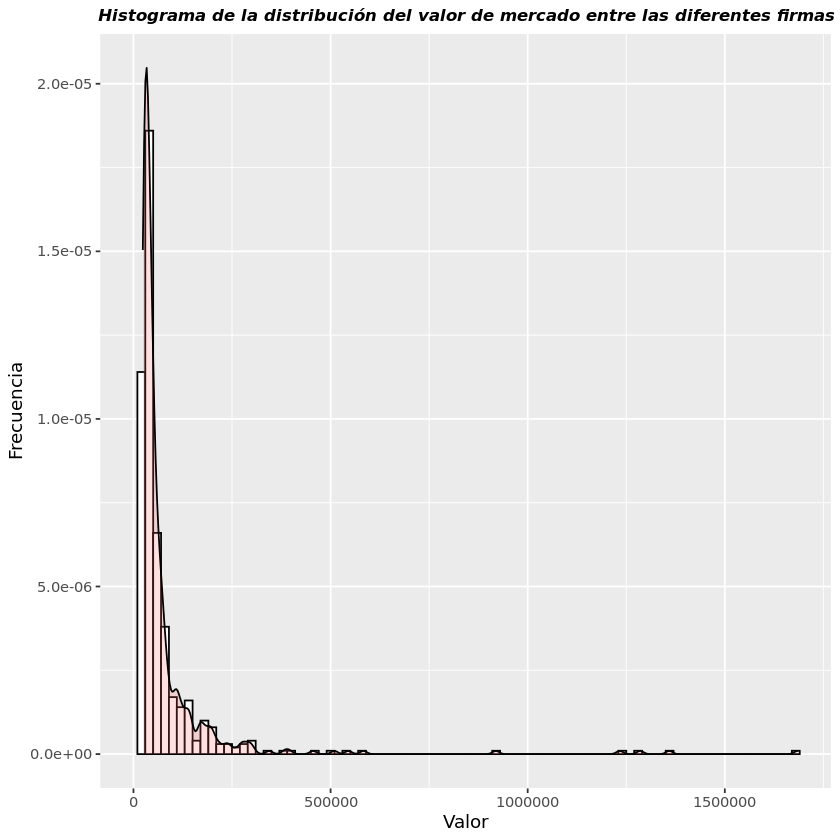

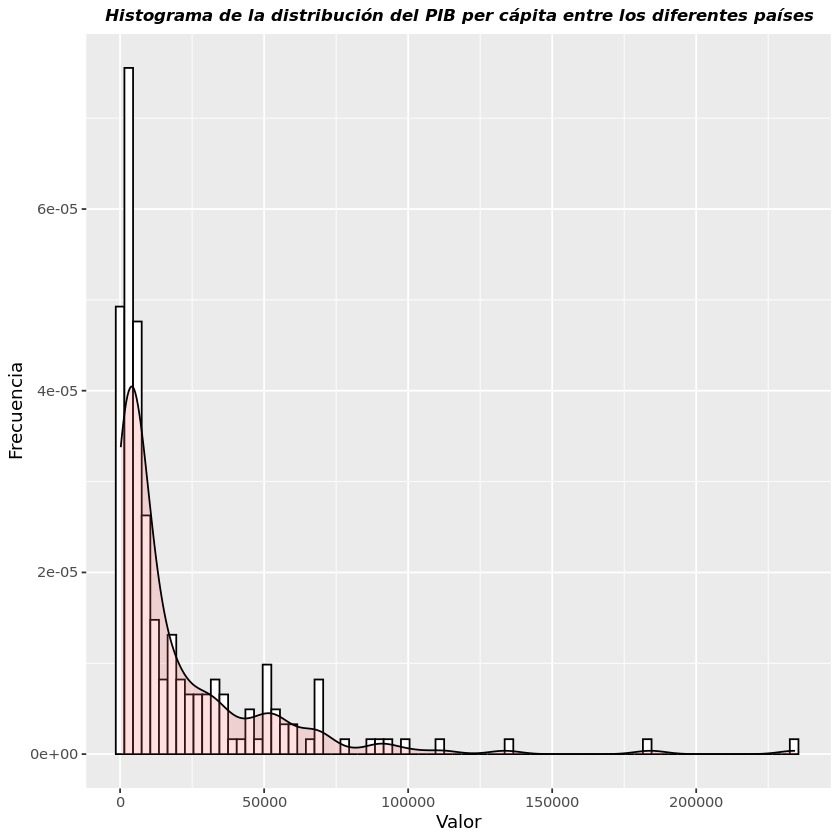

Warning message:
“Transformation introduced infinite values in continuous y-axis”


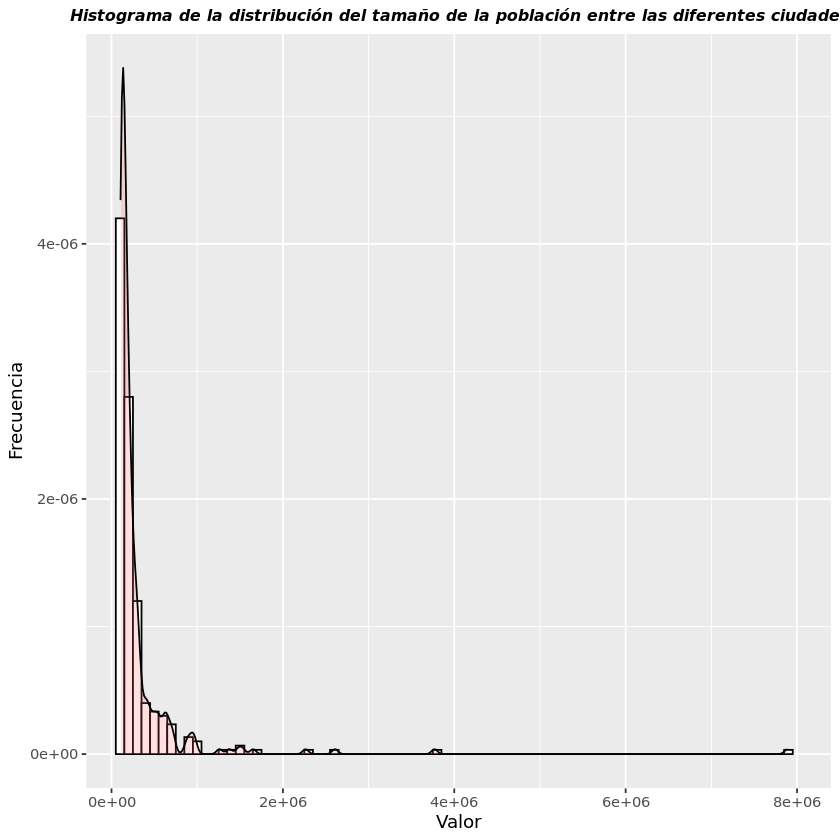

Warning message:
“Transformation introduced infinite values in continuous y-axis”


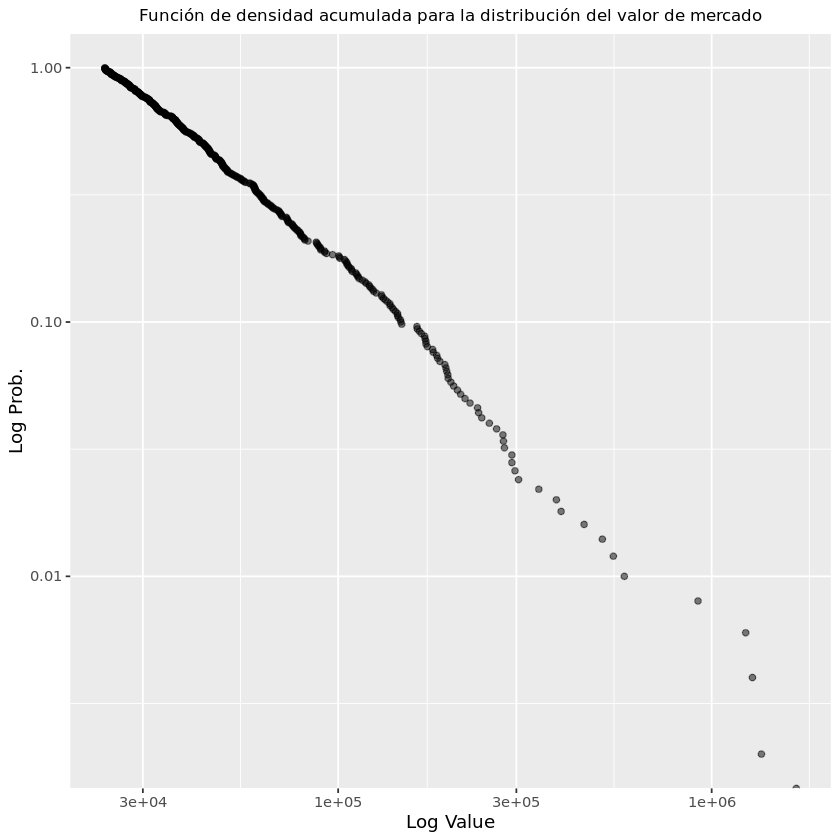

Warning message:
“Transformation introduced infinite values in continuous y-axis”


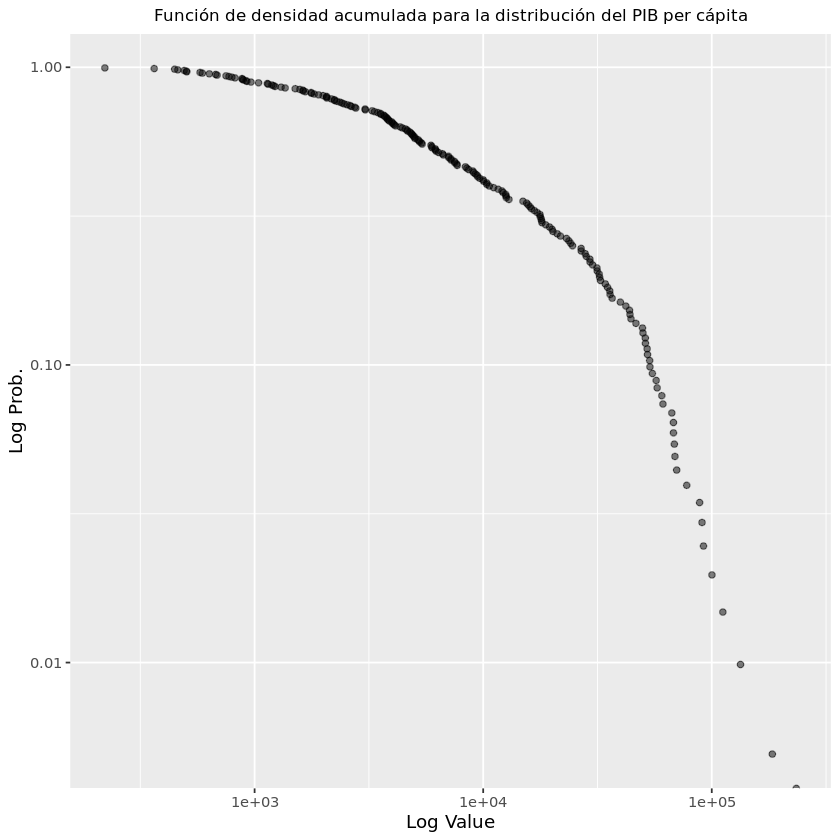

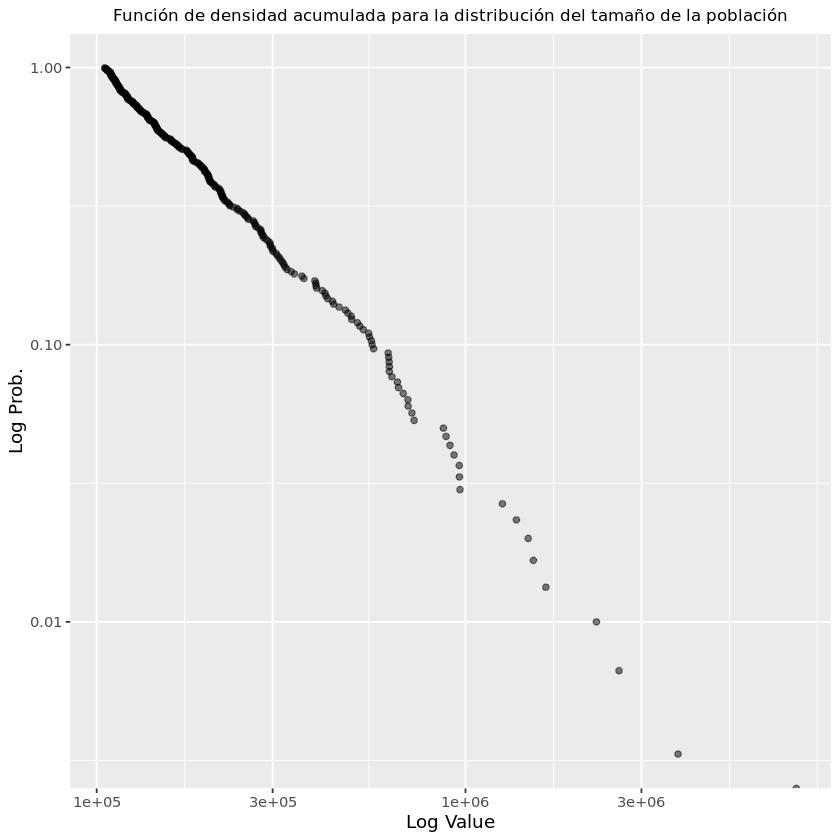

In [ ]:
# Leemos los diferentes conjuntos de datos
Firmas.Grandes<-read.csv("Firmas_Grandes.csv")
GDP<-read.csv("GDP.csv")
CiudadesUS<-read.csv("CiudadesUS.csv")

# Vemos cómo están estructurados los datasets
head(Firmas.Grandes)
head(GDP)
head(CiudadesUS)

# Graficamos los histogramas de las muestras
my.hist(Firmas.Grandes, "Market.Value", binwidth=20000, xmin=0,xmax=1684765) + 
    labs(title = 'Histograma de la distribución del valor de mercado entre las diferentes firmas') +
    theme(plot.title = element_text(size = 10)) +
    theme(plot.title = element_text(hjust = 0.5))

my.hist(GDP, "GDP.per.capita", binwidth=3000, xmin=0, xmax=235000) +
    labs(title = 'Histograma de la distribución del PIB per cápita entre los diferentes países') +
    theme(plot.title = element_text(size = 10)) +
    theme(plot.title = element_text(hjust = 0.5))

my.hist(CiudadesUS, "pop2023", binwidth=100000, xmin=100000, xmax=8000000) +
    labs(title = 'Histograma de la distribución del tamaño de la población entre las diferentes ciudades') +
    theme(plot.title = element_text(size = 9.5)) +
    theme(plot.title = element_text(hjust = 0.5))

# Graficamos la función de densidad empírica de las muestras
empirical_ccdf(Firmas.Grandes$Market.Value) +
    labs(title = 'Función de densidad acumulada para la distribución del valor de mercado') +
    theme(plot.title = element_text(size = 10)) +
    theme(plot.title = element_text(hjust = 0.5))

empirical_ccdf(GDP$GDP.per.capita) +
    labs(title = 'Función de densidad acumulada para la distribución del PIB per cápita') +
    theme(plot.title = element_text(size = 10)) +
    theme(plot.title = element_text(hjust = 0.5))

empirical_ccdf(CiudadesUS$pop2023) +
    labs(title = 'Función de densidad acumulada para la distribución del tamaño de la población') +
    theme(plot.title = element_text(size = 10)) +
    theme(plot.title = element_text(hjust = 0.5))

---

**Q:** En base a la discusión anterior, ¿qué tipo de modelo privilegiaría en cada uno de estos _datasets_? Decida qué modelo estadístico utilizará para intentar _aproximar_ el comportamiento de cada uno de los diferentes conjuntos de datos.

**R:** Es casi directo notar que los modelos que se deberían usar para modelar el comportamiento tanto del primer como del tercer conjunto de datos tiene que ser un modelo de "colas livianas", es decir, estos conjuntos de datos se pueden modelar haciendo uso de una distribución exponencial shifteada. Por otro lado, para modelar el segundo conjunto de datos queda en evidencia que hay que usar un modelo de "colas pesadas", o sea, una buena distribución para representar este conjunto de datos es una que siga una distribución Pareto. Esto, como se dijo es evidente, pero de todas maneras queda respaldado por las técnicas mencionadas en la pregunta $1$ sobre en qué cosas fijarse para decidir cómo modelar un conjunto de datos que a priori no sabemos qué distribución siguen.

---

Supongamos, a partir de ahora, que $c$ es un valor fijo y conocido para los modelos estadísticos que consideramos (SPG, puede tomarlo como $c = \min_{i =1, \dots, N} x_i$ para $x_i$ los datos de la muestra). Con esto, nos quedan modelos estadísticos que dependen únicamente del parámetro $\alpha$.

**4.-** Calcule una expresión para el EMV del parámetro alpha tanto para el modelo _Pareto_ como el _Exponencial shifteado_.

Veamos primero el modelo ***Pareto***. Notemos que la función de verosimilitud viene dada por:

$$\begin{aligned}\mathcal{L}_p(\alpha,X_1,...,X_N)&=\prod_{i=1}^Np_{\alpha,c}(X_i)\\&=\prod_{i=1}^N{\frac {\alpha c^{\alpha }}{X_i^{\alpha +1}}} 1_{X_i \geq c}\end{aligned}$$

Sin perdida de generalidad, podemos tomar $c=\min_{i=1,...N}X_i$, de donde obtenemos que como $\forall i\in[n], X_i\geq \min_{i=1,...N}X_i=c$, entonces la función de verosimilitud queda definida como:

$$\mathcal{L}_p(\alpha,X_1,...,X_N)=\prod_{i=1}^N{\frac {\alpha c^{\alpha }}{X_i^{\alpha +1}}}$$

Luego, podemos aplicar el logaritmo natural de donde obtenemos que la función de log verosimilitud viene dada por:

$$\begin{aligned}\mathcal{l}_p(\alpha,X_1,...,X_N)&=\ln({\mathcal{L}_p(\alpha,X_1,...,X_N)})\\&=\ln\left(\prod_{i=1}^N{\frac {\alpha c^{\alpha }}{X_i^{\alpha +1}}}\right)\\&=\sum_{i=1}^N\left(\ln(\alpha)+\alpha\ln(c)-\alpha\ln(X_i)-\ln(X_i)\right)\end{aligned}$$

Derivando, se obtiene que:

$$\begin{aligned}\frac{d\mathcal{l}}{d\alpha}&=\frac{d}{d\alpha}\left(\sum_{i=1}^N\left(\ln(\alpha)+\alpha\ln(c)-\alpha\ln(X_i)-\ln(X_i)\right)\right)\\&=\sum_{i=1}^N\left(\frac{1}{\alpha}+\ln(c)-\ln(X_i)\right)\\&=\frac{N}{\alpha}+N\ln(c)-\sum_{i=1}^Nln(X_i)\end{aligned}$$

Igualando a $0$ la expresión obtenida para determinar el EMV, resulta que:

$$\begin{aligned}\frac{d\mathcal{l}}{d\alpha}=0&\iff\frac{N}{\alpha}+N\ln(c)-\sum_{i=1}^Nln(X_i)=0\\&\iff\alpha=\frac{N}{-N\ln(c)+\sum_{i=1}^N\ln(X_i)}\end{aligned}$$

De esta manera, reemplazando $c$, el EMV para el modelo *Pareto* es:

$$\hat{\alpha_p}=\frac{N}{-N\ln(\min_{i=1,...N}X_i)+\sum_{i=1}^N\ln(X_i)}$$

Veamos ahora el EMV para el modelo ***Exponencial shifteado***. La función de verosmilitud viene dada por:

$$\begin{aligned}\mathcal{L}_q(\alpha,X_1,...,X_N)&=\prod_{i=1}^Nq_{\alpha,c}(X_i)\\&=\prod_{i=1}^N\alpha e^{-\alpha (X_i-c)} 1_{X_i \geq c}\end{aligned}$$

Similarmente al caso anterior, podemos escoger $c=\min_{i=1,...N}X_i$, de donde obtenemos que como $\forall i\in[n], X_i\geq \min_{i=1,...N}X_i=c$, la función de verosimilitud queda definida como:

$$\mathcal{L}_q(\alpha,X_1,...,X_N)=\prod_{i=1}^N\alpha e^{-\alpha (X_i-c)}$$

A continuación, aplicando logaritmo natural, nos queda que la función de log verosimilitud es:

$$\begin{aligned}\mathcal{l}_q(\alpha,X_1,...,X_N)&=\ln(\mathcal{L}_q(\alpha,X_1,...,X_N))\\&=\ln\left(\prod_{i=1}^N\alpha e^{-\alpha (X_i-c)}\right)\\&=\sum_{i=1}^N\left(\ln(\alpha)-\alpha X_i+\alpha c\right)\end{aligned}$$

Derivando, obtenemos que:

$$\begin{aligned}\frac{d\mathcal{l}_q}{d\alpha}&=\frac{d}{d\alpha}\left(\sum_{i=1}^N\left(\ln(\alpha)-\alpha X_i+\alpha c \right)\right)\\&=\sum_{i=1}^N\left(\frac{1}{\alpha}-X_i+c\right)\\&=\frac{N}{\alpha}+Nc-\sum_{i=1}^NX_i\end{aligned}$$

Igualando a $0$ la expresión de la derivada para obtener el EMV, se obtiene que:

$$\begin{aligned}\frac{d\mathcal{l}_q}{d\alpha}=0&\iff\frac{N}{\alpha}+Nc-\sum_{i=1}^NX_i=0\\&\iff\alpha=\frac{N}{-Nc+\sum_{i=1}^NX_i}\end{aligned}$$

Finalmente, reemplazando $c$, obtenemos que el EMV para el modelo *Exponencial shifteado* es:

$$\hat{\alpha_q}=\frac{N}{-N(\min_{i=1,...N}X_i)+\sum_{i=1}^NX_i}$$

**5.-** Determine, para cada modelo, si el EMV es _insesgado_ (o no) y _consistente_ (o no). 

Para $\hat{\alpha_p}$:

Sin pérdida de generalidad, consideremos $c=1$ para simplificar los cálculos. Si el EMV de la Pareto nos da insesgado o sesgado esto lo podemos extender a cualquier $c$, pues todo va a diferir tan solo en una constante, la cual no debería ser capaz de arreglar el sesgo (o sesgar un estimador insesgado). De esta manera, el EMV nos queda como:

$\hat{\alpha_p}=\frac{N}{\sum_{i=1}^N\ln(X_i)}=\frac{1}{\frac{\sum_{i=1}^N\ln(X_i)}{N}}$

En clase auxiliar se vio que si tenemos $N$ variables aleatorias iid tales que $X_i\sim Pareto(1,\alpha)$, entonces estas cumplirán que $\ln(X_i)\sim Exp(\alpha)$. Además, en cátedra se vio también que si tenemos $N$ variables aleatorias iid de ley $Exp(\lambda)$, entonces $\bar{X}\sim Gamma(N,N\lambda)$. De esta manera, obtenemos que:

$$\frac{\sum_{i=1}^N\ln(X_i)}{N}\sim Gamma(N,N\alpha)$$

Finalmente, calculando por definición la densidad de $\hat{\alpha_p}$, obtenemos que:

$$\begin{aligned}\mathbb{E}\left[\hat{\alpha_p}\right]&=\mathbb{E}\left[\frac{1}{\frac{\sum_{i=1}^N\ln(X_i)}{N}}\right]\\&=\int_{\mathbb{R}^+}\frac{1}{x}\frac{(n\alpha)^n}{(n-1)!}e^{-n\alpha x}x^{n-1}dx\\&=\frac{n\alpha}{n-1}\int_{\mathbb{R}^+}\frac{(n\alpha)^{n-1}}{(n-2)!}e^{-n\alpha x}x^{(n-1)-1}dx\\&=\frac{n\alpha}{n-1}\end{aligned}$$

Donde en el último paso se usó que lo que está dentro de la integral es la densidad de una Gamma de parámetros $n-1, n\alpha$, pro ende el resultado de la integral será $1$. De esta manera, como para $c=1$, $\mathbb{E}[\hat{\alpha_p}]\neq\alpha$, y por lo mencionado al inicio de la pregunta, entonces el EMV de la Pareto para un $c$ arbitrario es sesgado.

Para $\hat{\alpha_q}$, definiendo $\varphi(x)=\frac{1}{x}$, notemos que:

$$\begin{aligned}\mathbb{E}[\hat{\alpha_q}]&=\mathbb{E}\left[\frac{N}{-Nc+\sum_{i=1}^NX_i}\right]\\&=\mathbb{E}\left[\varphi\left(\frac{-Nc+\sum_{i=1}^NX_i}{N}\right)\right]\\&>\varphi\left(\mathbb{E}\left[\frac{-Nc+\sum_{i=1}^NX_i}{N}\right]\right)\\&=\varphi\left(\frac{-Nc+\sum_{i=1}^N\mathbb{E}[X_i]}{N}\right)\\&=\varphi\left(\frac{-Nc+\sum_{i=1}^N\frac{1}{\alpha}+c}{N}\right)\\&=\varphi\left(\frac{-Nc+N(\frac{1}{\alpha}+c)}{N}\right)\\&=\varphi\left(\frac{1}{\alpha}\right)\\&=\alpha\end{aligned}$$

En donde en el paso de la segunda a la tercera línea se utilizó la desigualdad de Jensen, pues $\varphi(x)$ es una función estrictamente convexa. De esta manera, como $\mathbb{E}[\hat{\alpha_q}]>\alpha\Longrightarrow\mathbb{E}[\hat{\alpha_q}]\neq\alpha$, entonces el EMV para el modelo de exponencial shifteado es sesgado.

Veamos ahora la consistencia de cada estimador. Primero, para el EMV de la pareto, tenemos que, considerando $Z_i=\ln(X_i)\sim Exp(\alpha) + c$ (como fue dicho en la parte en la que vimos el sesgo de este estimador), se tiene que, por la LGN (fuerte):

$$\frac{1}{N}\sum_{i=1}^N\ln(X_i)=\bar{Z_i}\overset{c.s}{\underset{N\to\infty}{\longrightarrow}}\mathbb{E}[Z_1]=\mathbb{E}[\ln(X_i)]=\frac{1}{\alpha} + c$$

De esta manera, por propiedades del curso de probabilidades, se tiene que:

$$\hat{\alpha_p}\overset{c.s}{\underset{N\to\infty}{\longrightarrow}}\frac{1}{-\ln(c)+\frac{1}{\alpha}+c}\neq\alpha$$

$\therefore$ El EMV para la Pareto no es consistente.

Luego, para el EMV de la exponencial shifteada, notemos que:

$$\begin{aligned}\hat{\alpha_q}&=\frac{N}{-Nc+\sum_{i=1}^NX_i}\\&=\frac{1}{-c+\bar{X}}\end{aligned}$$

Y además, por LGN (fuerte):

$$\bar{X}\overset{c.s}{\underset{N\to\infty}{\longrightarrow}}\mathbb{E}[X_1]=\frac{1}{\alpha}+c$$

Así, tenemos que por propiedades de probabilidades:

$$\hat{\alpha_q}\overset{c.s}{\underset{n\to\infty}{\longrightarrow}}\frac{1}{-c+\frac{1}{\alpha}+c}=\alpha$$

$\therefore$ Como $\hat{\alpha_q}\overset{c.s}{\underset{N\to\infty}{\longrightarrow}}\alpha$, entonces $\hat{\alpha_q}$ es consistente.

**6.-** Calcule esta cantidad para cada modelo, en cada uno de los datasets considerados. Grafique la curva asociada a este parámetro "óptimo" junto al histograma de los datos: ¿Qué observa? ¿Qué modelo le parece más fidedigno de lo que ocurre en la realidad en cada caso? ¿Se condice con lo que esperaba?

Observe si el valor del EMV calculado según la fórmula anterior coincide con lo que se obtiene de optimizar la log-verosimilitud utilizando el método optim de R.

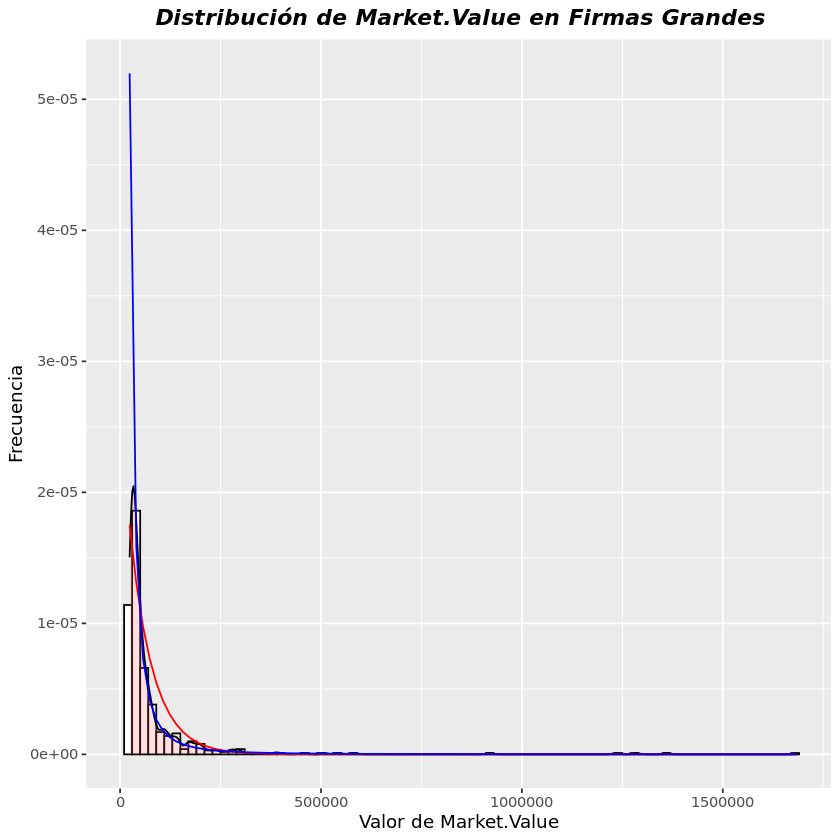

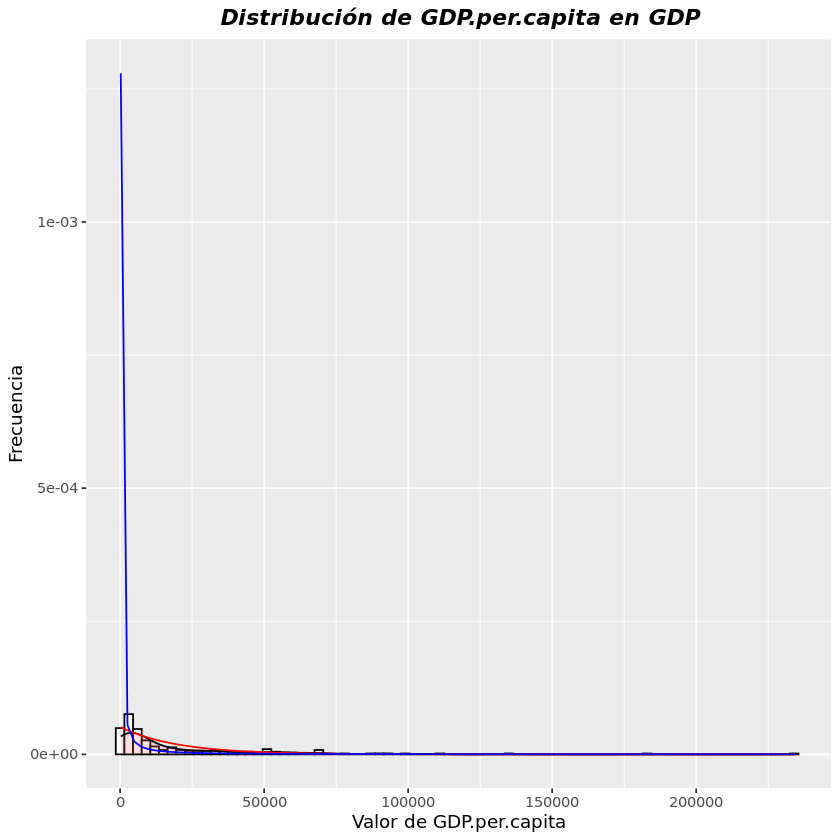

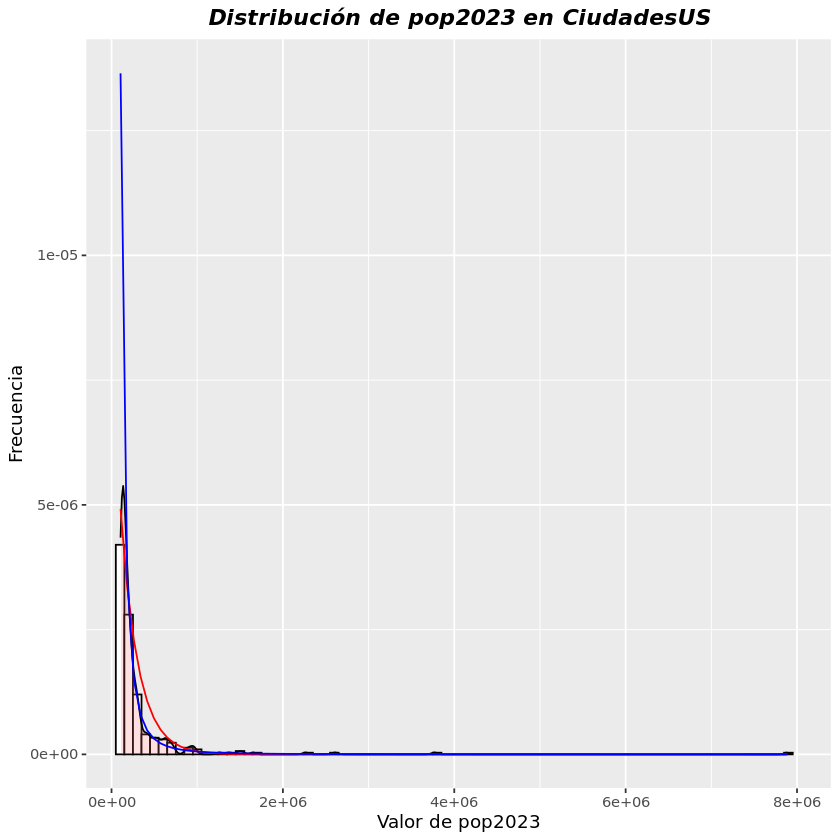

In [ ]:
# Calculamos los alpha según lo anterior:
alpha_pareto_firmas=with(Firmas.Grandes,length(Market.Value)/(-length(Market.Value)*log(min(Market.Value))+sum(log(Market.Value))))
alpha_pareto_gdp=with(GDP,length(GDP.per.capita)/(-length(GDP.per.capita)*log(min(GDP.per.capita))+sum(log(GDP.per.capita))))
alpha_pareto_ciudades=with(CiudadesUS,length(pop2023)/(-length(pop2023)*log(min(pop2023))+sum(log(pop2023))))
alpha_exponencial_firmas=with(Firmas.Grandes,length(Market.Value)/(-length(Market.Value)*min(Market.Value)+sum(Market.Value)))
alpha_exponencial_gdp=with(GDP,length(GDP.per.capita)/(-length(GDP.per.capita)*min(GDP.per.capita)+sum(GDP.per.capita)))
alpha_exponencial_ciudades=with(CiudadesUS,length(pop2023)/(-length(pop2023)*min(pop2023)+sum(pop2023)))




#Graficamos:
plot1 <- my.hist(Firmas.Grandes, "Market.Value", binwidth = 20000, xmin = 0, xmax = 1684765) +
  geom_function(fun = function(concentracion) exp.shift(alpha_exponencial_firmas, min(Firmas.Grandes$Market.Value), concentracion), color = "red") +
  geom_function(fun = function(concentracion) pareto(alpha_pareto_firmas, min(Firmas.Grandes$Market.Value), concentracion), color = "blue") +
  labs(title = "Distribución de Market.Value en Firmas Grandes",
       x = "Valor de Market.Value",
       y = "Frecuencia")

# Gráfico para GDP
plot2 <- my.hist(GDP, "GDP.per.capita", binwidth = 3000, xmin = 0, xmax = 235000) +
  geom_function(fun = function(concentracion) exp.shift(alpha_exponencial_gdp, min(GDP$GDP.per.capita), concentracion), color = "red") +
  geom_function(fun = function(concentracion) pareto(alpha_pareto_gdp, min(GDP$GDP.per.capita), concentracion), color = "blue") +
  labs(title = "Distribución de GDP.per.capita en GDP",
       x = "Valor de GDP.per.capita",
       y = "Frecuencia")

# Gráfico para CiudadesUS
plot3 <- my.hist(CiudadesUS, "pop2023", binwidth = 100000, xmin = 100000, xmax = 8000000) +
  geom_function(fun = function(concentracion) exp.shift(alpha_exponencial_ciudades, min(CiudadesUS$pop2023), concentracion), color = "red") +
  geom_function(fun = function(concentracion) pareto(alpha_pareto_ciudades, min(CiudadesUS$pop2023), concentracion), color = "blue") +
  labs(title = "Distribución de pop2023 en CiudadesUS",
       x = "Valor de pop2023",
       y = "Frecuencia")

plot1
plot2
plot3

---

**Q:** ¿Qué observa? ¿Qué modelo le parece más fidedigno de lo que ocurre en la realidad en cada caso? ¿Se condice con lo que esperaba?

**R:** Notemos que las curvas azules en los gráficos uno y tres (que representan la densidad de pareto), se acercan más a los datos reales, mientras que en el segundo gráfico se ve que la curva roja (densidad de la exponencial shifteada), se acerca más a los datos reales. Lo que coincide con lo esperado, pues es justamente lo que se respondió en la pregunta $3$.

---

In [ ]:
# Optimizamos usando optim mientras comparamos:
minus_logv_pareto_firmas <- function(par, data) {
  alpha <- par[1]
  values <- data$Market.Value
  logv <- sum(log(alpha)+alpha*log(min(values)) - (alpha + 1) * log(values))
  return(-1*logv)
}

resultado1 <- optim(par = 1, fn = minus_logv_pareto_firmas, data = Firmas.Grandes, method = "L-BFGS-B", lower = 0.001)
alphap1 <- resultado1$par

print("Pareto para las firmas grandes:")
print(alphap1)
print(alpha_pareto_firmas)

minus_logv_pareto_gdp <- function(par, data) {
  alpha <- par[1]
  values <- data$GDP.per.capita
  logv <- sum(log(alpha)+alpha*log(min(values)) - (alpha + 1) * log(values))
  return(-1*logv)
}

resultado2 <- optim(par = 1, fn = minus_logv_pareto_gdp, data = GDP, method = "L-BFGS-B", lower = 0.001)
alphap2 <- resultado2$par

print("Pareto para el GDP:")
print(alphap2)
print(alpha_pareto_gdp)


minus_logv_pareto_ciudades <- function(par, data) {
  alpha <- par[1]
  values <- data$pop2023
  logv <- sum(log(alpha)+alpha*log(min(values)) - (alpha + 1) * log(values))
  return(-1*logv)
}

resultado3 <- optim(par = 1, fn = minus_logv_pareto_ciudades, data = CiudadesUS, method = "L-BFGS-B",lower=0.0001)
alphap3 <- resultado3$par

print("Pareto para las ciudades:")
print(alphap3)
print(alpha_pareto_ciudades)

minus_logv_exp_firmas <- function(par, data) {
  alpha <- par[1]
  values <- data$Market.Value
  logv <- sum(log(alpha)-alpha*values+alpha*min(values))
  return(-1*logv)
}

resultado4 <- optim(par = 0.0001, fn = minus_logv_exp_firmas, data = Firmas.Grandes)
alphae1 <- resultado4$par

print("Exponencial shifteada para las firmas grandes:")
print(alphae1)
print(alpha_exponencial_firmas)

minus_logv_exp_gdp <- function(par, data) {
  alpha <- par[1]
  values <- data$GDP.per.capita
  logv <- sum(log(alpha)-alpha*values+alpha*min(values))
  return(-1*logv)
}

resultado5 <- optim(par = 0.0001, fn = minus_logv_exp_gdp, data = GDP)
alphae2 <- resultado5$par

print("Exponencial shifteada para el GDP:")
print(alphae2)
print(alpha_exponencial_gdp)

minus_logv_exp_ciudades <- function(par, data) {
  alpha <- par[1]
  values <- data$pop2023
  logv <- sum(log(alpha)-alpha*values+alpha*min(values))
  return(-1*logv)
}

resultado6 <- optim(par = 0.0001, fn = minus_logv_exp_ciudades, data = CiudadesUS)
alphae3 <- resultado6$par

print("Exponencial shifteada para las ciudades:")
print(alphae3)
print(alpha_exponencial_ciudades)

[1] "Pareto para las firmas grandes:"
[1] 1.23354
[1] 1.23354
[1] "Pareto para el GDP:"
[1] 0.2829269
[1] 0.2829257
[1] "Pareto para las ciudades:"
[1] 1.436082
[1] 1.436082
Warning message in optim(par = 1e-04, fn = minus_logv_exp_firmas, data = Firmas.Grandes):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”
[1] "Exponencial shifteada para las firmas grandes:"
[1] 1.75e-05
[1] 1.749124e-05
Warning message in optim(par = 1e-04, fn = minus_logv_exp_gdp, data = GDP):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”
[1] "Exponencial shifteada para el GDP:"
[1] 5.105469e-05
[1] 5.106061e-05
Warning message in optim(par = 1e-04, fn = minus_logv_exp_ciudades, data = CiudadesUS):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”
[1] "Exponencial shifteada para las ciudades:"
[1] 4.916992e-06
[1] 4.915568e-06


---

**Q:** Observe si el valor del EMV calculado según la fórmula anterior coincide con lo que se obtiene de optimizar la log-verosimilitud utilizando el método optim de R.

**R:** Se ve claramente que todos los parametros alpha que calculamos son muy similares a los calculados usando el metodo optim en la log versosimilitud, probando la consistencia entre los distintos métodos para obtener el parámetro $\alpha$ buscado.

---

**7.-** Calcule la información de Fisher para el parámetro $\alpha$ (denotada $I(\alpha)$) en ambos modelos.

Procedemos a calcular la información de fisher para una variable aleatoria con densidad pareto: (c conocido)

$$\begin{aligned}I(\alpha)=-\mathbb{E}_\alpha\left[\frac{\partial^2 ln(\frac{\alpha c^\alpha}{X^{\alpha+1}})}{\partial \alpha^2}\right]=-\mathbb{E}_\alpha\left[\frac{-1}{\alpha^2}\right]=\frac{1}{\alpha^2}\end{aligned}$$

Luego, calculamos la información de fisher para exponencial shifteada: (c conocido)
$$\begin{aligned}I(\alpha)=-\mathbb{E}_\alpha\left[\frac{\partial^2 ln(\alpha e^{-\alpha(X-c)})}{\partial \alpha^2}\right]=-\mathbb{E}_\alpha\left[\frac{-1}{\alpha^2}\right]=\frac{1}{\alpha^2}\end{aligned}$$



**8.-** Elija para cada conjunto de datos, el modelo estadístico que le parezca "mejor" para modelar el comportamiento de las v.a.s. 

Estime la información de Fisher numéricamente para el parámetro $\alpha$ en ese conjunto de datos (_Hint: podría usar, por ejemplo, un estimador de $\alpha$_). 

Determine (numéricamente) la cota de Cramer-Rao asociada a una muestra de $n$ datos. ¿Qué puede decir al respecto?

Como bien dijimos en la pregunta 6, el modelo estadístico que modela mejor el comportamiento de las v.a.s Firmas_Grandes es el modelo de pareto, para las v.a.s GDP es el modelo de la exponencial shifteada, y para las v.a.s Ciudades US es el modelo de pareto. Ahora procedemos a encontrar numericamente el valor de la información de Fisher para esos datos con los modelos mencionados:

In [ ]:
# Recordar que como son n variables aleatorias hay que multiplicar por n la cantidad de Fisher calculada en 7.
fisher_firmas<-length(Firmas.Grandes$Market.Value)/alpha_pareto_ciudades^2
fisher_gdp<-length(GDP$GDP.per.capita)/alpha_exponencial_gdp^2
fisher_ciudades<-length(CiudadesUS$pop2023)/alpha_pareto_ciudades^2
print("Información de Fisher para las firmas grandes:")
print(fisher_firmas)
print("Información de Fisher para el GDP:")
print(fisher_gdp)
print("Información de Fisher para las ciudades:")
print(fisher_ciudades)

[1] "Información de Fisher para las firmas grandes:"
[1] 242.444
[1] "Información de Fisher para el GDP:"
[1] 77861737452
[1] "Información de Fisher para las ciudades:"
[1] 145.4664


Calculamos las cotas de Cramer-Rao para cada modelo: (n = cantidad de la muestra)

In [ ]:
cr_firmas<-1/fisher_firmas
cr_gdp<-1/fisher_gdp
cr_ciudades<-1/fisher_ciudades
print("Cota de Cramer-Rao para las firmas grandes:")
print(cr_firmas)
print("Cota de Cramer-Rao para el GDP:")
print(cr_gdp)
print("Cota de Cramer-Rao para las ciudades:")
print(cr_ciudades)

[1] "Cota de Cramer-Rao para las firmas grandes:"
[1] 0.004124664
[1] "Cota de Cramer-Rao para el GDP:"
[1] 1.284328e-11
[1] "Cota de Cramer-Rao para las ciudades:"
[1] 0.00687444


---

**Q:** Determine (numéricamente) la cota de Cramer-Rao asociada a una muestra de $n$ datos. ¿Qué puede decir al respecto?

**R:** Estas cotas, nos indican una cota inferior para la varianza de cualquier estimador insesgado de $\alpha$ para los datos utilizando los modelos mencionados.

---

Para simplificar el resto de la tarea, considere únicamente UNO de los conjuntos de datos trabajados anteriormente.

**9.-** Buscaremos simular la v.a. dada por el EMV (buscando entender cómo es su "distribución"). 

Para ello, samplearemos $n=1000$ muestras al azar del dataset (elegiremos $n$ filas del dataset al azar) y las usaremos para calcular el EMV (con ese subconjunto aleatorio de $n$ datos). 

Repetiremos este proceso $N=1000$ veces, para obtener $N$ _realizaciones "independientes"_ de la v.a. $\alpha^{MV}_n$ (como posiblemente habrá filas que "se repitan" al volver a samplear, las cosas no son realmente independientes, pero ignoremos eso por ahora). 

Estudie (a partir de las $N$ muestras) la distribución de esta v.a. $\alpha^{MV}_n$ ¿Cuál es su media? ¿Y su varianza? ¿Cómo se compara esta última con la cota de Cramer-Rao que calculó antes?

Finalmente, grafique el histograma de las muestras de la v.a. $\alpha^{MV}_n$ y sobreponga la función de densidad de una gaussiana centrada en $\alpha$ (el "valor real" del parámetro, que en realidad desconocemos, pero que ya estimamos aproximadamente) y de varianza $\mathrm{Var}(\alpha^{MV}_n)$. Sobreponga también otra gaussiana centrada en el "valor real" $\alpha$, pero cuya varianza sea $I(\alpha)^{-1}$ (el inverso de la información de Fisher). ¿Qué puede comentar al respecto?

_Indicación: Si no está conforme con sus resultados, juege con los valores de $n$ y $N$ para intentar entender mejor lo que está pasando. También, recuerde los conceptos de normalidad asintótica y eficiencia asintótica_.

Media de alpha_MV: 1.437243 
Varianza de alpha_MV: 0.002184793 
Cota de Cramer-Rao: 0.002062332 


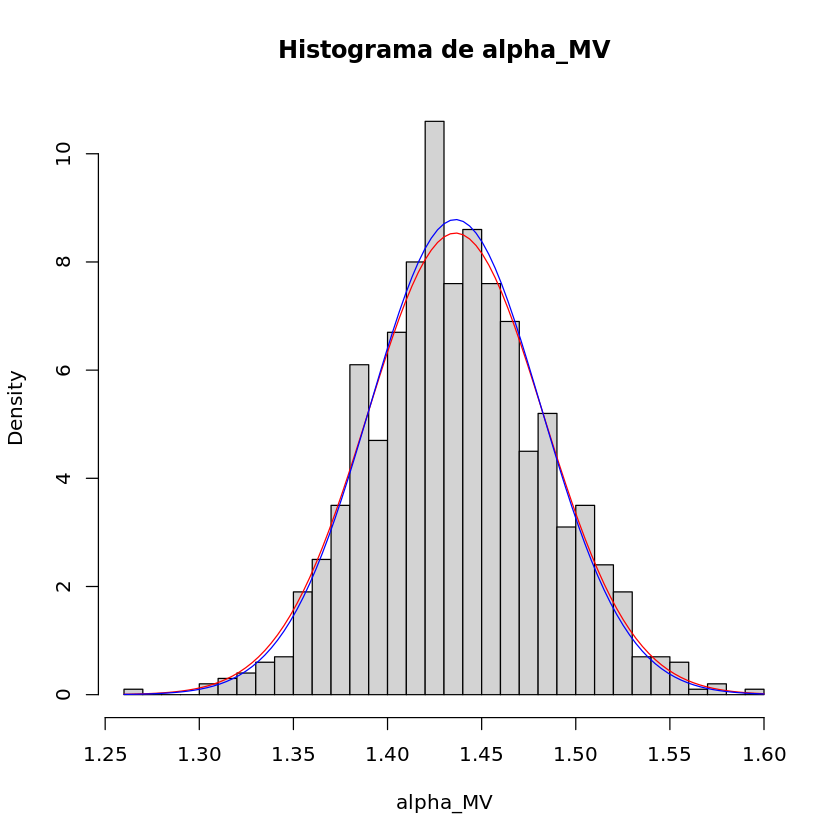

In [ ]:
# Elegimos los datos de las ciudades
datos <- CiudadesUS

# Número de muestras y repeticiones
n <- 1000  # Tamaño de la muestra
N <- 1000  # Número de repeticiones

# Vector para almacenar los resultados
alpha_MV_samples <- numeric(N)

# Realizar la simulación
for (i in 1:N) {
  # Seleccionar n filas aleatorias del dataset
  muestra <- datos[sample(nrow(datos), n, replace = TRUE), ]
  
  # Calcular el estimador de máxima verosimilitud (EMV)
  alpha_MV <-with(muestra,length(pop2023)/(-length(pop2023)*log(min(pop2023))+sum(log(pop2023))))
  
  # Almacenar el resultado en el vector
  alpha_MV_samples[i] <- alpha_MV
}

# Estadísticas de la v.a. alpha_MV
media <- mean(alpha_MV_samples)
varianza <- var(alpha_MV_samples)
cotacr<-alpha_pareto_ciudades^2/1000

cat("Media de alpha_MV:", media, "\n")
cat("Varianza de alpha_MV:", varianza, "\n")
cat("Cota de Cramer-Rao:", cotacr, "\n")

# Graficar el histograma superpuesto con las gaussianas
hist(alpha_MV_samples, breaks = 30, freq = FALSE, main = "Histograma de alpha_MV", xlab = "alpha_MV")

# Superponer la gaussiana centrada en alpha con varianza del estimador
curve(dnorm(x, mean = alpha_pareto_ciudades, sd = sqrt(varianza)), add = TRUE, col = "red")

# Superponer la gaussiana centrada en alpha con varianza la cota de Cramer-Rao
curve(dnorm(x, mean = alpha_pareto_ciudades, sd = sqrt(cotacr)), add = TRUE, col = "blue")



Notemos que la varianza de  $\alpha^{MV}_n$ es prácticamente igual que la cota de Cramer-Rao. Cuando pasa esto,se dice que el estimador es eficiente. Esto se ve en el gráfico, ya que ambas curvas están prácticamente superpuestas. Algo a tener en cuenta es que si n es pequeño, la varianza de  $\alpha^{MV}_n$ es mayor que la cota de Cramer-Rao. En cambio que si n es grande se llega a que la varianza del estimador es igual a la cota de Cramer-Rao. Esto último nos dice que el estimador es eficiente asintóticamente. Claramente esto se puede ver teniendo un N suficiente grande para tener hartas muestras de la v.a. A continuación hacemos lo mismo para el modelo de la exponencial shifteada:

Media de alpha_MV: 4.939498e-06 
Varianza de alpha_MV: 1.896195e-13 
Cota de Cramer-Rao: 2.416281e-14 


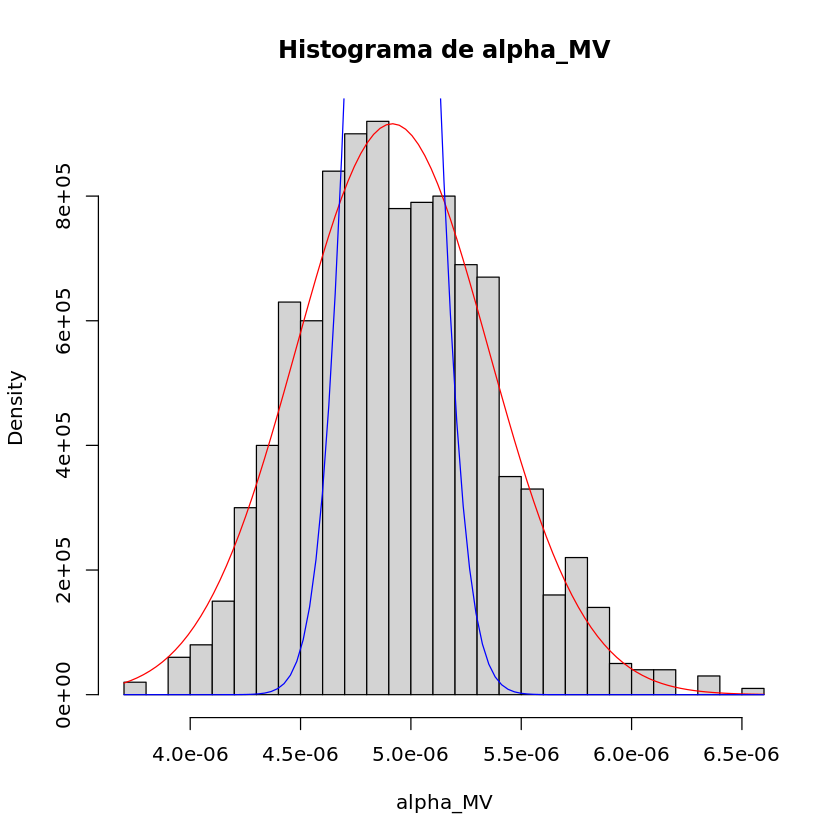

In [ ]:
# Vector para almacenar los resultados
alpha_MV_samples <- numeric(N)

# Realizar la simulación
for (i in 1:N) {
  # Seleccionar n filas aleatorias del dataset
  muestra <- datos[sample(nrow(datos), n, replace = TRUE), ]
  
  # Calcular el estimador de máxima verosimilitud (EMV)
  alpha_MV <-with(muestra,length(pop2023)/(-length(pop2023)*min(pop2023)+sum(pop2023)))

  # Almacenar el resultado en el vector
  alpha_MV_samples[i] <- alpha_MV
}

# Estadísticas de la v.a. alpha_MV
media <- mean(alpha_MV_samples)
varianza <- var(alpha_MV_samples)
cotacr<-alpha_exponencial_ciudades^2/1000

cat("Media de alpha_MV:", media, "\n")
cat("Varianza de alpha_MV:", varianza, "\n")
cat("Cota de Cramer-Rao:", cotacr, "\n")

# Graficar el histograma superpuesto con las gaussianas
hist(alpha_MV_samples, breaks = 30, freq = FALSE, main = "Histograma de alpha_MV", xlab = "alpha_MV")

# Superponer la gaussiana centrada en alpha con varianza del estimador
curve(dnorm(x, mean = alpha_exponencial_ciudades, sd = sqrt(varianza)), add = TRUE, col = "red")

# Superponer la gaussiana centrada en alpha con varianza la cota de Cramer-Rao
curve(dnorm(x, mean = alpha_exponencial_ciudades, sd = sqrt(cotacr)), add = TRUE, col = "blue")


Notemos que en este caso la varianza del estimador es mayor a la cota de Cramer-Rao. Por lo que para el caso exponencial no es eficiente el EMV.

**10.-** ¿Podemos hablar de eficiencia si consideramos un modelo en que se _mezclen_ las Pareto con las Exponenciales? ¿Sería _regular_ un tal modelo?

Si sería un modelo regular, ya que siempre la información de fisher será positiva ya que $\frac{1}{\alpha^2}>0$, y ambas densidades son posivas también. Eso sumado a que las integrales de las densidades derivadas una o dos veces convergen. Luego, para este modelo, si tenemos el estimador de máxima verosimilitud, no siempre se podrá hablar de eficiencia por la parte anterior.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a05167b5-a5ea-492f-b37a-264b99f6ae3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>